# Group Lab 3 - Comparative Urban Change in US States
#### Group 5 (Justin Han, Wendy Liang, Rachel Paresa, Alec Raines, Denny Wang)
#### February 27, 2019

## Part 1 - Data Description and Overview

Commonly, an urban area refers to any location with high population density, in addition to built infrastructure. Highly populated and well-developed cities can also be coined the term of urban. Any areas that are not considered urban areas are then considered to be rural areas. For the US, urban areas can be categorized as either _urbanized areas_ or _urban clusters_. Urbanized areas (UAs) are defined as urban areas with a population of at least 50,000 people. This category was the first to be delineated in the US Census of the year 1950. Urban clusters (UCs) are defined as urban areas with a population of at least 2,500, but less than 50,000 people. This category was the second to be delineated in the US Census of the year 2000. [Wiki](https://en.wikipedia.org/wiki/Urban_area#United_States) According to the US Census Bureau back in 2010, census tracts and/or census blocks that fall under the definition of an urban area has to meet the above mentioned population density requirements. [US Census Bureau](https://www.census.gov/geo/reference/ua/urban-rural-2010.html)

In contrast to the US's requirements of urban areas, other countries might approach the specifications differently. These factors of different requirements can also be due to the trade off of population versus land coverage and different style of migration. For a country that's densely populated and annual increases in urbanization, such as China, the specifications can be quite different. The trend of the population of China is to work in the cities, but go home to the countryside when free. These kind of working lifestyles can make it hard to take an accurate and precise census of their population. For China, census estimates are also different depending on the population counted within administrative city limits, and outside. [Wiki](https://en.wikipedia.org/wiki/Urban_area#China) As such, it can be extremely hard for China to put a hard number on the population of an area for it to be classified as urban or rural. After some research to find census specific data for urban/rural areas of China, I find most of China's population division to be based upon provinces and cities, rather than tracts. This can be due to mentioned problems of not being able to get precise data from the constant migration that is always happening.

For this lab, we'll be using data from Washington State's Office of Financial Management (OFM) and placing focus on demographics. More specifically, we'll be using the small area population and housing data that comes from the Small Area Estimates Program (SAEP). The estimates that the data are based on are built off of recent data, in addition to being calculated and built off of previous years. As such, it's recommended for users to not combine SAEP datasets that come from different years. This dataset has three specific allocations for determining census blocks: Group Quarters Population Allocation, Housing Unit Allocation, and Population Allocation. Because data from the SAEP are based upon estimates and yearly processes, there are certain limitations to them. For example, the estimates are subject to errors that can arise from census count errors in regardless to insufficient or inaccurate source data, as well as modeling error. The user guide for the data set also advises users that want to calculate occupany rates and household size ratios from SAEP data to do so at their own risk. [OFM](https://www.ofm.wa.gov/sites/default/files/public/legacy/pop/smallarea/docs/saep_user_guide.pdf)

We did some the data analysis on Washington using the SAEP's data. From there, we found the top ten largest populated counties of 2017 in the state, the top being King County followed by Pierce County. The population estimates of King County more than doubles that estimated in Pierce. When we change up our focus and look more into urban versus rural areas, we can see that in the last decade, most of the census blocks have been deurbanized. Our prediction for this trend is that portions of the population are moving towards more urbanized areas, leading to a higher congregation of people.

## Part 2 - Basic Processing with Python

##### Task 2.1: Creates Shapefile For Each County

In [4]:
#PART 2. CREATES SHAPEFILE FOR EACH COUNTY
import sys
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.6\\bin')
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.6\\arcpy')
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.6\\ArcToolbox\\Scripts')
import arcpy

#create workspace
arcpy.env.workspace="C:\\Users\\Ginue Han\\geog458_assignment\\lab3"

#join saep_bg10.shp and WashingtonFIPS by county FIPS. add the county name field to shape file.
arcpy.JoinField_management("saep_bg10\\saep_bg10.shp","COUNTYFP10", "WashingtonFIPS.dbf", "FIPSCounty",["CountyName"])

#create a list with the fields names of the shapefile
field_names = [str(f.name) for f in arcpy.ListFields("saep_bg10\\saep_bg10.shp")]

#list to store all county names in WA
county_names =[]
#create cursor for shapefile to loop through each row
cursor = arcpy.da.SearchCursor("saep_bg10\\saep_bg10.shp", "CountyName")
#uses cursor to loop through each row in shapefile inorder to add unique countynames into countynames list
for row in cursor:
    if str(row[0]) not in county_names:
        county_names.append(str(row[0]))
del cursor

#loops through county names and uses the Select_analysis tool to select rows from saep_bg10 shapefile that are from the currently
#selected county and creates a new shapefile for that county. 
for county in county_names:
    in_features = "saep_bg10\\saep_bg10.shp"
    out_feature_class = "CountyData\\{0}.shp".format(county)
    where_clause='"CountyName" = \'{0}\''.format(county)
    arcpy.Select_analysis(in_features, out_feature_class, where_clause)

ImportError: No module named arcpy

##### Task 2.2: WA Counties with the Largest Populations¶

In [42]:
import pandas as pd
import geopandas

#read files into geopandas
waShape = geopandas.read_file("saep_bg10/saep_bg10.shp")
countyName = geopandas.read_file("WashingtonFIPS.dbf")

#join the shapefile and county name file together
wa_st = pd.merge(waShape, countyName, left_on = ['COUNTYFP10'], right_on = ['FIPSCounty'], how = 'left')

#create dataframe of countyname and 2017 population
cnty_pop = wa_st[['CountyName', 'POP2017']]

#additional functions to dataframe
cnty_pop = cnty_pop.groupby(['CountyName'])
cnty_pop = cnty_pop.sum()
cnty_pop = cnty_pop.sort_values(by = ['POP2017'], ascending=False)
cnty_pop.columns = ['Population (2017)']
cnty_pop.index.names = ['County Name']

#print out county dataframe of county name and population
cnty_pop.head(10)

,Population (2017)
County Name,
King,2153700.0
Pierce,859400.0
Snohomish,789400.0
Spokane,499800.0
Clark,471000.0
Thurston,276900.0
Kitsap,264300.0
Yakima,253000.0
Whatcom,216300.0


## Part 3 - Urban vs. Rural

Percentage of population urbanized in 2017 is 21.26 percent
Percentage of land area urbanized in 2017 is 14.71 percent
Percentage of block groups that urbanized from 2007 - 2017 is 8.70 percent
Percentage of block groups that deurbanized from 2007 - 2017 is 91.30 percent


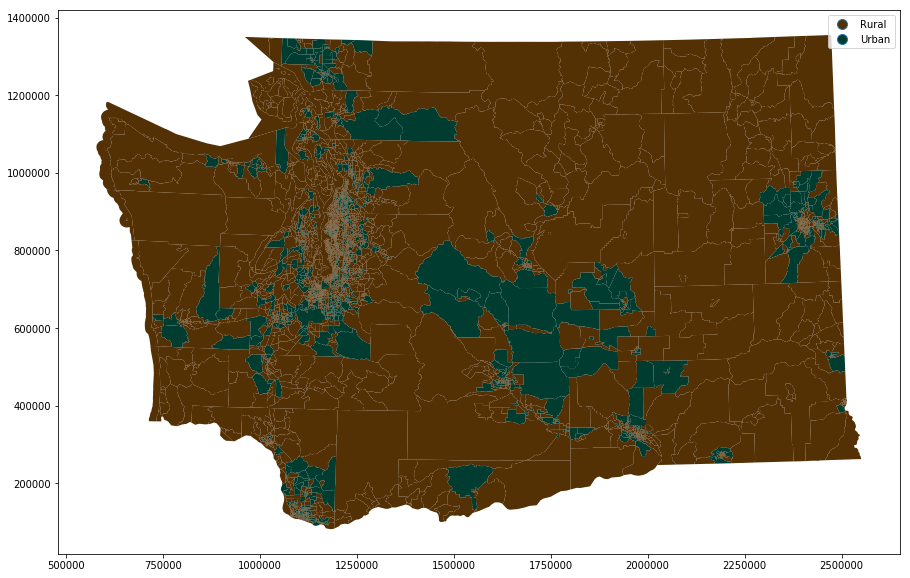

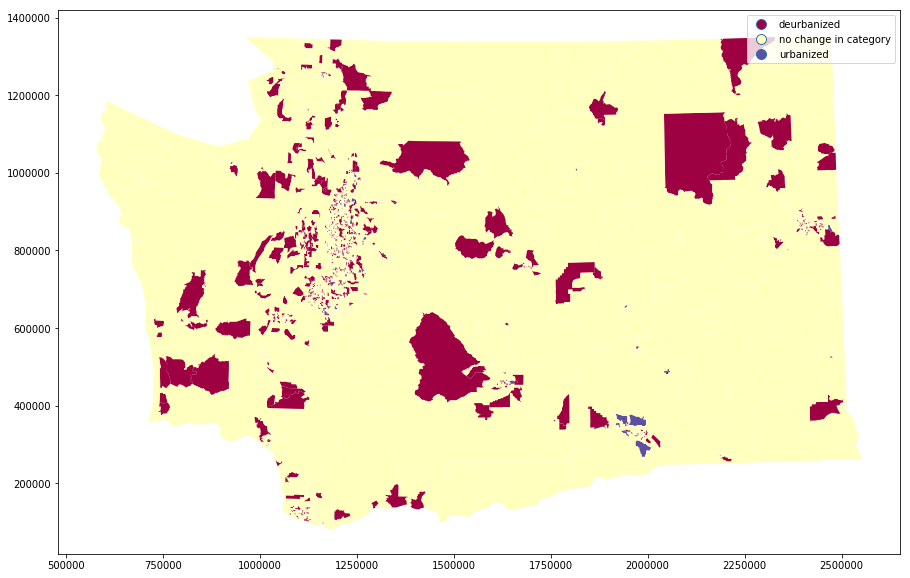

In [43]:
#3.1     
#Add column to give each block value of urban or rural based on 2017
#The threshold at which a block is considered urban or rural is determined by the jenks natural breaks classification method
for index, row in wa_st.iterrows():
    if row['POP2017']>1921.638:
        wa_st.loc[index,'Urban/Rural']='Urban'
    else:
        wa_st.loc[index,'Urban/Rural']='Rural'

#3.2
#Calculates and prints out what percentage of population is urbanized for 2017
#Sum up the populations that are 'Urban'
urbanCount = (float)((wa_st['Urban/Rural'] =='Urban').sum())
#Sum up the populations that are 'Rural'
ruralCount = (float)((wa_st['Urban/Rural'] =='Rural').sum())
#Calculate the percentage of the population urbanized
percent = 100.00 *( urbanCount / (urbanCount+ruralCount))
print 'Percentage of population urbanized in 2017 is %.2f percent' %  percent

#3.3
#Calculates and prints out what percentage of land area is urbanized for 2017
#Making dataframe of only rows that are 'Urban', then sum up the land area 
urban = wa_st['Urban/Rural'] == 'Urban'
wa_st_urban = wa_st[urban]
urbanCountLA = (float)((wa_st_urban['ALANDMI']).sum())
#Making dataframe of only rows that are 'Rural', then sum up the land area 
rural = wa_st['Urban/Rural'] == 'Rural'
wa_st_rural = wa_st[rural]
ruralCountLA = (float)((wa_st_rural['ALANDMI']).sum())
#Calculate total land area of urbanized and the percentage of it
percentLA = 100.00 *( urbanCountLA / (urbanCountLA+ruralCountLA))
print 'Percentage of land area urbanized in 2017 is %.2f percent' %  percentLA

#3.4
#Add column to the shapefile datatable for whether block groups have urbanized, no change in category, or deurbanized: 2007 v 20017 
for index, row in wa_st.iterrows():
   # value = row['POP2017'] - row['POP2007'] >1921.638
    if  row['POP2007'] >= 1464.438: #urban in 2007 
        if row['POP2017'] >= 1921.638: #urban in 2017 
            wa_st.loc[index,'Urban/Rural 2007-2017']='no change in category'
        else: #not urban in 2017 
            wa_st.loc[index,'Urban/Rural 2007-2017']='deurbanized'
    else: #not urban in 2007 
        if row['POP2017'] >= 1921.638: #urban in 2017 
            wa_st.loc[index,'Urban/Rural 2007-2017']='urbanized'
        else: #not urban in 2017 
            wa_st.loc[index,'Urban/Rural 2007-2017']='no change in category'

#3.5 
#Write code that calculates and prints out how many block groups urbanized and how many deurbanized over the previous decade.
urbanCountChange = (float)((wa_st['Urban/Rural 2007-2017'] =='urbanized').sum())
deurbanCountChange = (float)((wa_st['Urban/Rural 2007-2017'] =='deurbanized').sum())
percentChangeUrban = 100.00 *( urbanCountChange/ (urbanCountChange+deurbanCountChange))
print 'Percentage of block groups that urbanized from 2007 - 2017 is %.2f percent' %  percentChangeUrban
percentChangeDeurban = 100.00 *( deurbanCountChange/ (urbanCountChange+deurbanCountChange))
print 'Percentage of block groups that deurbanized from 2007 - 2017 is %.2f percent' %  percentChangeDeurban

#3.6
#Rename geometry_x to geometry to be able to plot using the GeoDataFrame
wa_st = wa_st.rename(columns = {'geometry_x':'geometry'})

#Map the Urban/Rural column to show which areas are urbanized and which are not
wa_st.plot(column = 'Urban/Rural', cmap = 'BrBG', legend = True, figsize = (20,10))

#Map the Urban/Rural 2007-2017 column to show which areas have deurbanized, urbanized, or stayed the same
wa_st.plot(column = 'Urban/Rural 2007-2017', cmap = 'Spectral', legend = True, figsize = (20,10))

